In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from array import *
import math

##All datasets

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/ML_research/Initial_dataset/Anuradhapura_yala_init.csv')
dataset2="Anuradhapura yala kannaya"

In [ ]:
df = df2
df

dataset=dataset2
print(df)

    year       radn       maxt       mint       rain  yield
0   1982  13.964224  30.216260  21.984553   5.186992   3071
1   1983  13.909704  30.895122  22.535772   7.790244   3071
2   1984  14.522048  30.185484  21.874597   5.306452   3144
3   1985  14.172840  29.731707  22.085366   6.678049   3972
4   1986  14.785345  30.398780  22.426829   3.191870   4567
5   1987  14.793163  30.868293  22.402439   6.611382   3867
6   1988  14.150715  30.399798  22.207956   6.579782   3544
7   1989  15.089947  30.362602  21.900750   6.911382   3694
8   1990  13.980062  30.176423  22.203252   6.333333   3824
9   1991  14.026976  29.982114  21.878862   5.713821   4096
10  1992  13.768245  29.850000  21.680081   5.335484   3594
11  1993  11.893079  29.201626  22.434146  10.999187   3710
12  1994  13.355604  29.623577  22.030081   6.318699   3837
13  1995  14.607738  30.494309  22.077236   6.735772   4018
14  1996  15.250721  30.361290  21.575806   4.008871   3700
15  1997  14.581983  30.960163  22.79756

##pre processing

In [ ]:
#Delete row whose column value is equal to 0
df = df.drop(df.index[df['radn'] == 0])
df = df.drop(df.index[df['maxt'] == 0])
df = df.drop(df.index[df['mint'] == 0])
df = df.drop(df.index[df['rain'] == 0])
df = df.drop(df.index[df['yield'] == 0])
df.size

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
from sklearn.neural_network import MLPRegressor
from sklearn import neighbors
from sklearn.ensemble import RandomForestRegressor
print(df)

    year       radn       maxt       mint       rain  yield
0   1982  13.964224  30.216260  21.984553   5.186992   3071
1   1983  13.909704  30.895122  22.535772   7.790244   3071
2   1984  14.522048  30.185484  21.874597   5.306452   3144
3   1985  14.172840  29.731707  22.085366   6.678049   3972
4   1986  14.785345  30.398780  22.426829   3.191870   4567
5   1987  14.793163  30.868293  22.402439   6.611382   3867
6   1988  14.150715  30.399798  22.207956   6.579782   3544
7   1989  15.089947  30.362602  21.900750   6.911382   3694
8   1990  13.980062  30.176423  22.203252   6.333333   3824
9   1991  14.026976  29.982114  21.878862   5.713821   4096
10  1992  13.768245  29.850000  21.680081   5.335484   3594
11  1993  11.893079  29.201626  22.434146  10.999187   3710
12  1994  13.355604  29.623577  22.030081   6.318699   3837
13  1995  14.607738  30.494309  22.077236   6.735772   4018
14  1996  15.250721  30.361290  21.575806   4.008871   3700
15  1997  14.581983  30.960163  22.79756

<Axes: >

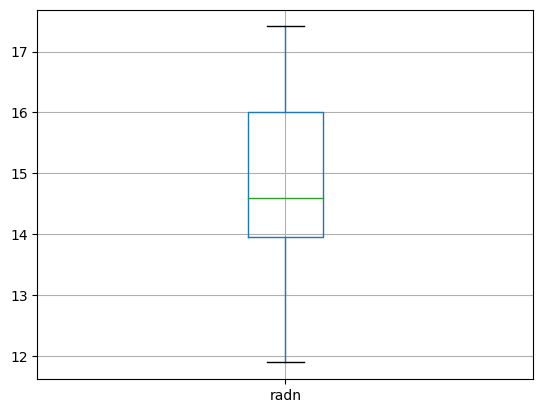

In [ ]:
df.boxplot(column=['radn'])

<Axes: >

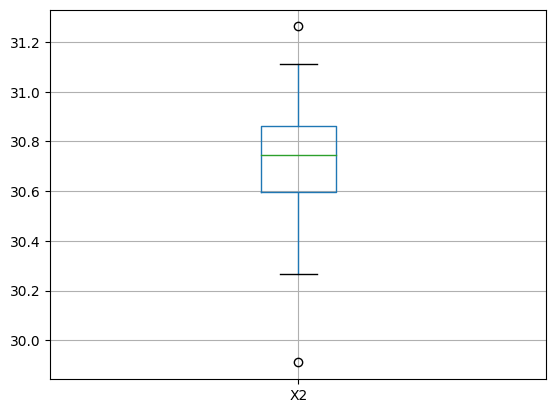

In [ ]:
df.boxplot(column=['maxt'])


<Axes: >

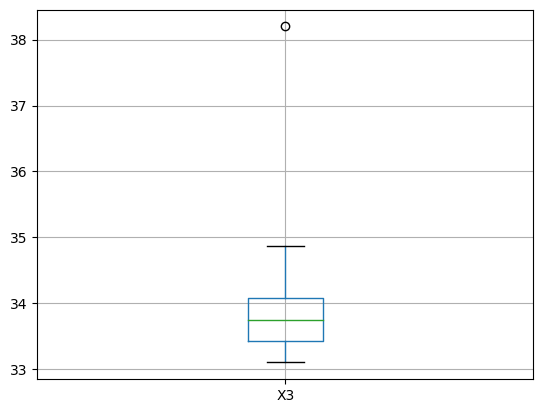

In [ ]:
df.boxplot(column=['mint'])


<Axes: >

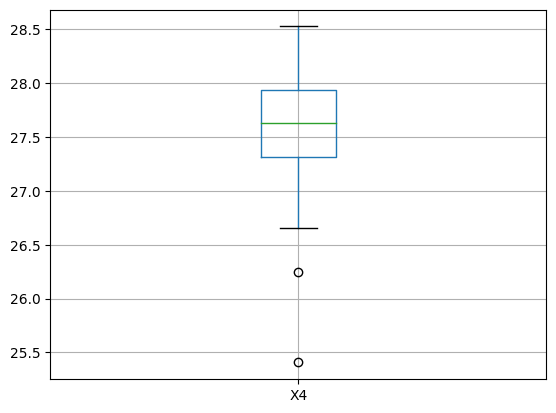

In [ ]:
df.boxplot(column=['rain'])


In [ ]:
df['radn'] = np.where(df['radn'] < (df['radn'].quantile(0.10)), (df['radn'].quantile(0.10)),df['radn'])
df['radn'] = np.where(df['radn'] >(df['radn'].quantile(0.90)), (df['radn'].quantile(0.90)),df['radn'])

df['maxt'] = np.where(df['maxt'] < (df['maxt'].quantile(0.10)), (df['maxt'].quantile(0.10)),df['maxt'])
df['maxt'] = np.where(df['maxt'] >(df['maxt'].quantile(0.90)), (df['maxt'].quantile(0.90)),df['maxt'])

df['mint'] = np.where(df['mint'] < (df['mint'].quantile(0.10)), (df['mint'].quantile(0.10)),df['mint'])
df['mint'] = np.where(df['mint'] >(df['mint'].quantile(0.90)), (df['mint'].quantile(0.90)),df['mint'])

df['rain'] = np.where(df['rain'] < (df['rain'].quantile(0.10)), (df['rain'].quantile(0.10)),df['rain'])
df['rain'] = np.where(df['rain'] >(df['rain'].quantile(0.90)), (df['rain'].quantile(0.90)),df['rain'])


In [ ]:
####################3
def bias_value(y_test, y_pred):
  ytest_list = list(y_test.values)
  diff=0.0
  avg_diff=0.0
  for i in range(0,len(ytest_list)):
    diff=diff+ytest_list[i]-y_pred[i]

  avg_diff=diff/len(ytest_list)
  return avg_diff

data = {'Method': ['Linear Regression','SVR','MLP','KNN','Random Forest'],
        'RMSE test': [0,0,0,0,0],
        'RMSE train': [0,0,0,0,0],
        'RRMSE test': [0,0,0,0,0],
        'RRMSE train': [0,0,0,0,0],
        'MAE test': [0,0,0,0,0],
        'MAE train': [0,0,0,0,0],
        'R2_score test': [0,0,0,0,0],
        'R2_score train': [0,0,0,0,0],
        'Bias test': [0,0,0,0,0],
        'Bias train': [0,0,0,0,0],
        }

mydf = pd.DataFrame(data, columns = ['Method', 'RMSE test','RMSE train','RRMSE test','RRMSE train','MAE test','MAE train','R2_score test','R2_score train','Bias test','Bias train'])
print(mydf)
test_percentage = 0.3
test_size = math.floor(len(df.index)*test_percentage)
print(test_size)

df_train = df[:-test_size]
df_test = df[-test_size:]

print(len(df.index), len(df_train.index) , len(df_test.index))

              Method  RMSE test  RMSE train  RRMSE test  RRMSE train  \
0  Linear Regression          0           0           0            0   
1                SVR          0           0           0            0   
2                MLP          0           0           0            0   
3                KNN          0           0           0            0   
4      Random Forest          0           0           0            0   

   MAE test  MAE train  R2_score test  R2_score train  Bias test  Bias train  
0         0          0              0               0          0           0  
1         0          0              0               0          0           0  
2         0          0              0               0          0           0  
3         0          0              0               0          0           0  
4         0          0              0               0          0           0  
9
32 23 9


Feature: 0, Score: 0.25906
Feature: 1, Score: 0.11434
Feature: 2, Score: 0.44340
Feature: 3, Score: 0.18320


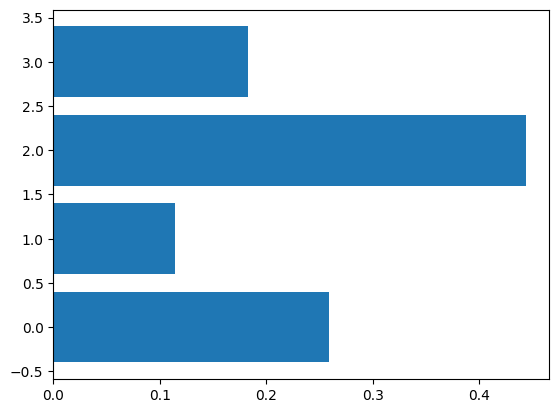

[[0, 0.2590613665548718], [1, 0.11433584808058192], [2, 0.4434003213929112], [3, 0.18320246397163506], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]


In [ ]:
#Random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt

X=df_train.drop(['year','yield'], axis=1)
y=df_train['yield']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=42)

feature_names = [f"feature {i}" for i in range(X.shape[1])]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)
x_train = pd.DataFrame(X_train)
X_test = scaler.transform(x_test)
x_test = pd.DataFrame(X_test)

rf = RandomForestRegressor(random_state=42)

rf.fit(x_train,y_train)

importance = rf.feature_importances_
# summarize feature importance and assign them to an array 'arr' with the feature index
arr = [[0 for x in range(2)] for y in range(11)]
for i,v in enumerate(importance):
	arr[i][0] = i
	arr[i][1] = v
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.barh([x for x in range(len(importance))], importance)
plt.show()

print(arr)


[[2, 0.4434003213929112], [0, 0.2590613665548718], [3, 0.18320246397163506], [1, 0.11433584808058192], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]]


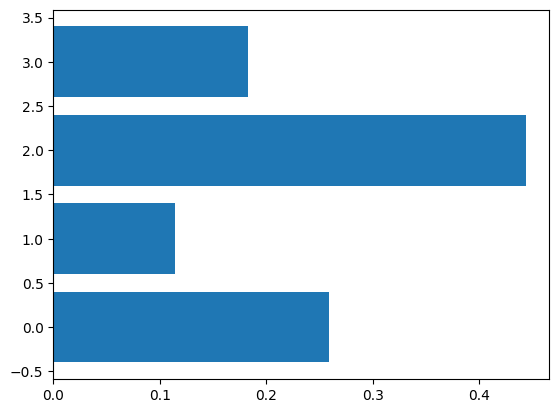

In [ ]:
arr.sort(key=lambda row: (row[1]), reverse=True)
print(arr)
plt.barh([x[0] for x in arr],[x[1] for x in arr])
plt.show()


In [ ]:
acc_array=list()
#feature_array=list()


cv = KFold(n_splits=5, shuffle=True, random_state=42)

for n in range(1,12):
  num_of_features = n
  #print(num_of_features)
  selected = [0 for y in range(num_of_features)]
  for i in range(num_of_features):
    selected[i] = sorted(arr,key=lambda row: (row[1]), reverse=True)[i]
  print(selected)
  selected_features_list = [0 for y in range(num_of_features)]
  for i in range(num_of_features):
    selected_features_list[i] = df_train.columns[selected[i][0]+1]
  print(selected_features_list)

[[2, 0.4434003213929112]]
['mint']
[[2, 0.4434003213929112], [0, 0.2590613665548718]]
['mint', 'radn']
[[2, 0.4434003213929112], [0, 0.2590613665548718], [3, 0.18320246397163506]]
['mint', 'radn', 'rain']
[[2, 0.4434003213929112], [0, 0.2590613665548718], [3, 0.18320246397163506], [1, 0.11433584808058192]]
['mint', 'radn', 'rain', 'maxt']
[[2, 0.4434003213929112], [0, 0.2590613665548718], [3, 0.18320246397163506], [1, 0.11433584808058192], [0, 0]]
['mint', 'radn', 'rain', 'maxt', 'radn']
[[2, 0.4434003213929112], [0, 0.2590613665548718], [3, 0.18320246397163506], [1, 0.11433584808058192], [0, 0], [0, 0]]
['mint', 'radn', 'rain', 'maxt', 'radn', 'radn']
[[2, 0.4434003213929112], [0, 0.2590613665548718], [3, 0.18320246397163506], [1, 0.11433584808058192], [0, 0], [0, 0], [0, 0]]
['mint', 'radn', 'rain', 'maxt', 'radn', 'radn', 'radn']
[[2, 0.4434003213929112], [0, 0.2590613665548718], [3, 0.18320246397163506], [1, 0.11433584808058192], [0, 0], [0, 0], [0, 0], [0, 0]]
['mint', 'radn', 'ra

<ipython-input-29-4350fa38c53b>:82: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  acc_array.append(np.mean(np.array(rmse_test_arr).astype(np.float)))
<ipython-input-29-4350fa38c53b>:83: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if(min > np.mean(np.array(rmse_test_arr).astype(np.float))):
<ipython-input-29-4350fa38c53b>:84: Deprecation

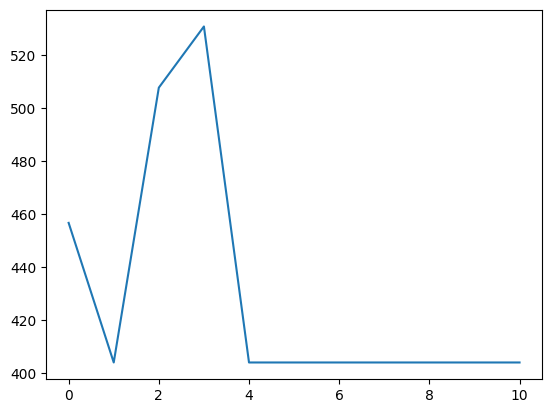

['mint', 'radn']
403.92719999999997


In [ ]:

acc_array=list()
#feature_array=list()


cv = KFold(n_splits=5, shuffle=True, random_state=42)
min=2000
selected_features_final=list()
for n in range(1,12):
  num_of_features = n
  selected = [[0 for x in range(2)] for y in range(num_of_features)]
  #copy the selected most important n features' indices and their importance to 'selected' array
  for i in range(num_of_features):
    selected[i] = sorted(arr,key=lambda row: (row[1]), reverse=True)[i]
  #assign selected feature columns in 'X' dataset to new dataset 'selected_features'
  selected_features = pd.DataFrame()
  selected_features_list = [0 for y in range(num_of_features)]
  for i in range(num_of_features):
    selected_features[i] = df_train.iloc[:, selected[i][0]+1]
    #print(selected_features)
    selected_features_list[i] = df_train.columns[selected[i][0]+1]
  #print(selected_features_list)
  rmse_test_arr = []
  rrmse_test_arr =[]
  r2_test_arr= []
  mae_test_arr = []

  rmse_train_arr = []
  rrmse_train_arr =[]
  r2_train_arr= []
  mae_train_arr = []

  bias_test_arr = []
  bias_train_arr = []
  #print(selected_features[i])
  for tr, tt in cv.split(df_train): #tr,tt are indexes
    x_train, x_test = selected_features[i].iloc[tr], selected_features[i].iloc[tt]
    y_train, y_test = df_train['yield'].iloc[tr], df_train['yield'].iloc[tt]
    #print(tr,tt)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(pd.DataFrame(x_train))
    X_test = scaler.transform(pd.DataFrame(x_test))
    model =  RandomForestRegressor(n_estimators = 1000, random_state = 42).fit(X_train, y_train)
    y_pred= model.predict(X_test)
    y_pred_train= model.predict(X_train)

    r2_test=r2_score(y_test,y_pred)
    r2_train=r2_score(y_train,y_pred_train)
    #print(r2_test)
    #print(r2_train)
    r2_test_arr.append(r2_test)
    r2_train_arr.append(r2_train)

    rmse_test = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
    #print("\nRMSE test: ", rmse_test)
    rmse_test_arr.append(rmse_test)

    rrmse_test = format(float(rmse_test*100/np.mean(y_test)),'.2f')
    #print("\nRRMSE test: ", rrmse_test,"%")
    rrmse_test_arr.append(rrmse_test)

    rmse_train = float(format(np.sqrt(mean_squared_error(y_train, y_pred_train)), '.3f'))
    #print("\nRMSE train: ", rmse_train)
    rmse_train_arr.append(rmse_train)

    rrmse_train = format(float(rmse_train*100/np.mean(y_train)),'.2f')
    #print("\nRRMSE train: ", rrmse_train,"%")
    rrmse_train_arr.append(rrmse_train)


    mae_test = float(format(mean_absolute_error(y_test, y_pred), '.3f'))
    #print("\nMAE Test: ", mae_test)
    mae_test_arr.append(mae_test)
    mae_train = float(format(mean_absolute_error(y_train, y_pred_train), '.3f'))
    #print("\nMAE Train: ", mae_train)
    mae_train_arr.append(mae_train)

    #print("\nBias Test: \n", bias_value(y_test,y_pred))
    bias_test_arr.append(bias_value(y_test,y_pred))
    #print("\nBias Train: \n", bias_value(y_train, y_pred_train))
    bias_train_arr.append(bias_value(y_train, y_pred_train))

  acc_array.append(np.mean(np.array(rmse_test_arr).astype(np.float)))
  if(min > np.mean(np.array(rmse_test_arr).astype(np.float))):
    min=np.mean(np.array(rmse_test_arr).astype(np.float))
    selected_features_final = selected_features_list
plt.plot(np.arange(11), acc_array)
plt.show()
print(selected_features_final)
print(min)

##LinearRegression

[ 1  2  3  5  6  7  8  9 11 13 14 15 16 17 19 20 21 23 24 25 27 29 30 31
 32 33 34 36 37 38 41 42 43 45 46 47 48 49 50 51 52 53 54 57 58 59 60 61
 62 63 64 66 67 68 69 71 72 73 74 75 76 77 78 79 80 82 83 84 85 87 88 89] [ 0  4 10 12 18 22 26 28 35 39 40 44 55 56 65 70 81 86]
[ 0  1  2  3  4  6  7  8 10 12 13 14 15 17 18 19 20 21 22 23 24 25 26 27
 28 29 32 34 35 36 37 38 39 40 41 43 44 45 46 48 50 51 52 53 54 55 56 57
 58 59 60 61 63 64 65 70 71 72 74 77 78 79 80 81 82 83 84 85 86 87 88 89] [ 5  9 11 16 30 31 33 42 47 49 62 66 67 68 69 73 75 76]
[ 0  1  2  4  5  9 10 11 12 14 15 16 18 20 21 22 23 26 28 29 30 31 32 33
 35 36 37 39 40 41 42 43 44 46 47 48 49 50 51 52 54 55 56 57 58 59 60 61
 62 63 65 66 67 68 69 70 71 72 73 74 75 76 77 79 80 81 82 83 85 86 88 89] [ 3  6  7  8 13 17 19 24 25 27 34 38 45 53 64 78 84 87]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 33 34 35 37 38 39 40 42 44 45 47 49 51 52 53 55 56
 59 60 62 63 64 65 66 67 6

<ipython-input-209-3ad98d35e788>:65: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data['RRMSE test'][0]=np.mean(np.array(rrmse_test_arr).astype(np.float))
<ipython-input-209-3ad98d35e788>:66: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data['RRMSE train'][0]=np.mean(np.array(rrmse_train_arr).astype(np.float))


<BarContainer object of 5 artists>

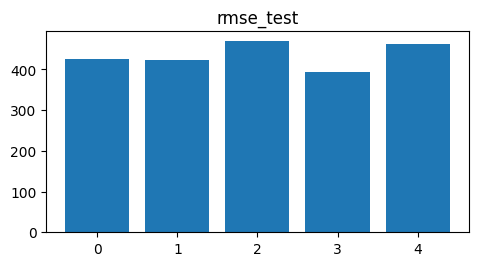

In [ ]:
cv = KFold(n_splits=5, shuffle=True,random_state=42)

rmse_test_arr = []
rrmse_test_arr =[]
r2_test_arr= []
mae_test_arr = []

rmse_train_arr = []
rrmse_train_arr =[]
r2_train_arr= []
mae_train_arr = []

bias_test_arr = []
bias_train_arr = []

for tr, tt in cv.split(df_train): #tr,tt are indexes
    x_train, x_test = df_train[selected_features_final].iloc[tr], df_train[selected_features_final].iloc[tt]
    y_train, y_test = df_train['yield'].iloc[tr], df_train['yield'].iloc[tt]
    print(tr,tt)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(x_train)
    X_test = scaler.transform(x_test)
    model = LinearRegression().fit(X_train, y_train)
    y_pred= model.predict(X_test)
    y_pred_train= model.predict(X_train)

    r2_test=r2_score(y_test,y_pred)
    r2_train=r2_score(y_train,y_pred_train)
    #print(r2_test)
    #print(r2_train)
    r2_test_arr.append(r2_test)
    r2_train_arr.append(r2_train)

    rmse_test = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
    #print("\nRMSE test: ", rmse_test)
    rmse_test_arr.append(rmse_test)

    rrmse_test = format(float(rmse_test*100/np.mean(y_test)),'.2f')
    #print("\nRRMSE test: ", rrmse_test,"%")
    rrmse_test_arr.append(rrmse_test)

    rmse_train = float(format(np.sqrt(mean_squared_error(y_train, y_pred_train)), '.3f'))
    #print("\nRMSE train: ", rmse_train)
    rmse_train_arr.append(rmse_train)

    rrmse_train = format(float(rmse_train*100/np.mean(y_train)),'.2f')
    #print("\nRRMSE train: ", rrmse_train,"%")
    rrmse_train_arr.append(rrmse_train)

    mae_test = float(format(mean_absolute_error(y_test, y_pred), '.3f'))
    #print("\nMAE Test: ", mae_test)
    mae_test_arr.append(mae_test)
    mae_train = float(format(mean_absolute_error(y_train, y_pred_train), '.3f'))
    #print("\nMAE Train: ", mae_train)
    mae_train_arr.append(mae_train)

    #print("\nBias Test: \n", bias_value(y_test,y_pred))
    bias_test_arr.append(bias_value(y_test,y_pred))
    #print("\nBias Train: \n", bias_value(y_train, y_pred_train))
    bias_train_arr.append(bias_value(y_train, y_pred_train))

data['Method'][0]='Linear Regression'
data['RMSE test'][0]=np.mean(rmse_test_arr)
data['RMSE train'][0]=np.mean(rmse_train_arr)
data['RRMSE test'][0]=np.mean(np.array(rrmse_test_arr).astype(np.float))
data['RRMSE train'][0]=np.mean(np.array(rrmse_train_arr).astype(np.float))
data['MAE test'][0]=np.mean(mae_test_arr)
data['MAE train'][0]=np.mean(mae_train_arr)
data['R2_score test'][0]=np.mean(r2_test_arr)
data['R2_score train'][0]=np.mean(r2_train_arr)
data['Bias test'][0]=np.mean(bias_test_arr)
data['Bias train'][0]=np.mean(bias_train_arr)

#print(np.array(rmse_test_arr).astype(np.float))
print(rmse_test_arr)
print(sum(rmse_test_arr)/5)
plt.figure(figsize=(12,12))
plt.subplot(4, 2, 1)
plt.title("rmse_test")
plt.bar([x for x in [0,1,2,3,4]],[rmse_test_arr[x] for x in [0,1,2,3,4]])

In [ ]:

tr = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24,
 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 37, 38, 39, 40, 42, 44, 45, 47, 49, 51, 52, 53, 55, 56,
 59, 60, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 73, 74, 75, 76, 77, 78, 81, 82, 83, 84, 86, 87]
tt = [15, 32, 36, 41, 43, 46, 48, 50, 54, 57, 58, 61, 72, 79, 80, 85, 88, 89]
x_train, x_test = df_train[selected_features_final].iloc[tr], df_train[selected_features_final].iloc[tt]
y_train, y_test = df_train['yield'].iloc[tr], df_train['yield'].iloc[tt]
print(tr,tt)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)
model = LinearRegression().fit(X_train, y_train)

x_ = df_test[selected_features_final]
y_ = df_test['yield']
y_pred_ = model.predict(x_)

rmse_test = float(format(np.sqrt(mean_squared_error(y_pred_, y_)), '.3f'))
print("\nRMSE test: ", rmse_test)

rrmse_test = format(float(rmse_test*100/np.mean(y_)),'.2f')
print("\nRRMSE test: ", rrmse_test,"%")


# plt.figure(figsize=(12,12))
# plt.scatter(y_, y_pred_)
# # p1 = max(max(y_pred_), max(y_))
# # p2 = min(min(y_pred_), min(y_))
# # plt.plot( [p1,p2], [p1,p2], linestyle='--', color='k' )
# plt.show()



[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 37, 38, 39, 40, 42, 44, 45, 47, 49, 51, 52, 53, 55, 56, 59, 60, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 73, 74, 75, 76, 77, 78, 81, 82, 83, 84, 86, 87] [15, 32, 36, 41, 43, 46, 48, 50, 54, 57, 58, 61, 72, 79, 80, 85, 88, 89]

RMSE test:  10637.226

RRMSE test:  256.64 %


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


###Lasso

<BarContainer object of 5 artists>

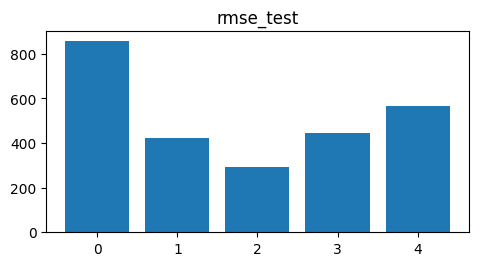

In [ ]:


cv = KFold(n_splits=5, shuffle=False)

# Iterate through CV splits
rmse_test_arr = []
rrmse_test_arr =[]
r2_test_arr= []
mae_test_arr = []

rmse_train_arr = []
rrmse_train_arr =[]
r2_train_arr= []
mae_train_arr = []

for tr, tt in cv.split(df_train): #tr,tt are indexes
    x_train, x_test = df_train[selected_features_final].iloc[tr], df_train[selected_features_final].iloc[tt]
    y_train, y_test = df_train['yield'].iloc[tr], df_train['yield'].iloc[tt]
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(x_train)
    X_test = scaler.transform(x_test)
    model = Lasso(alpha=0.01).fit(X_train, y_train)
    y_pred= model.predict(X_test)
    y_pred_train= model.predict(X_train)

    r2_test=r2_score(y_test,y_pred)
    r2_train=r2_score(y_train,y_pred_train)
    #print(r2_test)
    #print(r2_train)
    r2_test_arr.append(r2_test)
    r2_train_arr.append(r2_train)

    rmse_test = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
    #print("\nRMSE test: ", rmse_test)
    rmse_test_arr.append(rmse_test)

    rrmse_test = format(float(rmse_test*100/np.mean(y_test)),'.2f')
    #print("\nRRMSE test: ", rrmse_test,"%")
    rrmse_test_arr.append(rrmse_test)

    rmse_train = float(format(np.sqrt(mean_squared_error(y_train, y_pred_train)), '.3f'))
    #print("\nRMSE train: ", rmse_train)
    rmse_train_arr.append(rmse_train)

    rrmse_train = format(float(rmse_train*100/np.mean(y_train)),'.2f')
    #print("\nRRMSE train: ", rrmse_train,"%")
    rrmse_train_arr.append(rrmse_train)


    mae_test = float(format(mean_absolute_error(y_test, y_pred), '.3f'))
    #print("\nMAE Test: ", mae_test)
    mae_test_arr.append(mae_test)
    mae_train = float(format(mean_absolute_error(y_train, y_pred_train), '.3f'))
    #print("\nMAE Train: ", mae_train)
    mae_train_arr.append(mae_train)

                #print("\nBias Test: \n", bias_value(y_test,y_pred))
    bias_test_arr.append(bias_value(y_test,y_pred))
    #print("\nBias Train: \n", bias_value(y_train, y_pred_train))
    bias_train_arr.append(bias_value(y_train, y_pred_train))

# data['Method'][0]='LR'
# data['RMSE test'][0]=np.mean(rmse_test_arr)
# data['RMSE train'][0]=np.mean(rmse_train_arr)
# data['RRMSE test'][0]=np.mean(np.array(rrmse_test_arr).astype(np.float))
# data['RRMSE train'][0]=np.mean(np.array(rrmse_train_arr).astype(np.float))
# data['MAE test'][0]=np.mean(mae_test_arr)
# data['MAE train'][0]=np.mean(mae_train_arr)
# data['R2_score test'][0]=np.mean(r2_test_arr)
# data['R2_score train'][0]=np.mean(r2_train_arr)

plt.figure(figsize=(12,12))
plt.subplot(4, 2, 1)
plt.title("rmse_test")
plt.bar([x for x in [0,1,2,3,4]],[rmse_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 2)
# plt.title("rmse_train")
# plt.bar([x for x in [0,1,2,3,4]],[rmse_train_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 3)
# plt.title("rrmse_test")
# plt.bar([x for x in [0,1,2,3,4]],[rrmse_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 4)
# plt.title("rrmse_train")
# plt.bar([x for x in [0,1,2,3,4]],[rrmse_train_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 5)
# plt.title("r2_test")
# plt.bar([x for x in [0,1,2,3,4]],[r2_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 6)
# plt.title("r2_train")
# plt.bar([x for x in [0,1,2,3,4]],[r2_train_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 7)
# plt.title("mae_test")
# plt.bar([x for x in [0,1,2,3,4]],[mae_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 8)
# plt.title("mae_train")
# plt.bar([x for x in [0,1,2,3,4]],[mae_train_arr[x] for x in [0,1,2,3,4]])
# plt.show()



###Ridge

<BarContainer object of 5 artists>

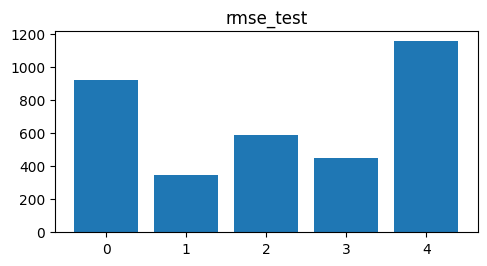

In [ ]:


cv = KFold(n_splits=5, shuffle=False)

# Iterate through CV splits
rmse_test_arr = []
rrmse_test_arr =[]
r2_test_arr= []
mae_test_arr = []

rmse_train_arr = []
rrmse_train_arr =[]
r2_train_arr= []
mae_train_arr = []

for tr, tt in cv.split(df_train): #tr,tt are indexes
    x_train, x_test = df_train.drop(['year','yield'], axis=1).iloc[tr], df_train.drop(['year','yield'], axis=1).iloc[tt]
    y_train, y_test = df_train['yield'].iloc[tr], df_train['yield'].iloc[tt]
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(x_train)
    X_test = scaler.transform(x_test)
    model = Ridge(alpha=0.01).fit(X_train, y_train)
    y_pred= model.predict(X_test)
    y_pred_train= model.predict(X_train)

    r2_test=r2_score(y_test,y_pred)
    r2_train=r2_score(y_train,y_pred_train)
    #print(r2_test)
    #print(r2_train)
    r2_test_arr.append(r2_test)
    r2_train_arr.append(r2_train)

    rmse_test = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
    #print("\nRMSE test: ", rmse_test)
    rmse_test_arr.append(rmse_test)

    rrmse_test = format(float(rmse_test*100/np.mean(y_test)),'.2f')
    #print("\nRRMSE test: ", rrmse_test,"%")
    rrmse_test_arr.append(rrmse_test)

    rmse_train = float(format(np.sqrt(mean_squared_error(y_train, y_pred_train)), '.3f'))
    #print("\nRMSE train: ", rmse_train)
    rmse_train_arr.append(rmse_train)

    rrmse_train = format(float(rmse_train*100/np.mean(y_train)),'.2f')
    #print("\nRRMSE train: ", rrmse_train,"%")
    rrmse_train_arr.append(rrmse_train)

    mae_test = float(format(mean_absolute_error(y_test, y_pred), '.3f'))
    #print("\nMAE Test: ", mae_test)
    mae_test_arr.append(mae_test)
    mae_train = float(format(mean_absolute_error(y_train, y_pred_train), '.3f'))
    #print("\nMAE Train: ", mae_train)
    mae_train_arr.append(mae_train)

# data['Method'][0]='LR'
# data['RMSE test'][0]=np.mean(rmse_test_arr)
# data['RMSE train'][0]=np.mean(rmse_train_arr)
# data['RRMSE test'][0]=np.mean(np.array(rrmse_test_arr).astype(np.float))
# data['RRMSE train'][0]=np.mean(np.array(rrmse_train_arr).astype(np.float))
# data['MAE test'][0]=np.mean(mae_test_arr)
# data['MAE train'][0]=np.mean(mae_train_arr)
# data['R2_score test'][0]=np.mean(r2_test_arr)
# data['R2_score train'][0]=np.mean(r2_train_arr)

plt.figure(figsize=(12,12))
plt.subplot(4, 2, 1)
plt.title("rmse_test")
plt.bar([x for x in [0,1,2,3,4]],[rmse_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 2)
# plt.title("rmse_train")
# plt.bar([x for x in [0,1,2,3,4]],[rmse_train_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 3)
# plt.title("rrmse_test")
# plt.bar([x for x in [0,1,2,3,4]],[rrmse_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 4)
# plt.title("rrmse_train")
# plt.bar([x for x in [0,1,2,3,4]],[rrmse_train_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 5)
# plt.title("r2_test")
# plt.bar([x for x in [0,1,2,3,4]],[r2_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 6)
# plt.title("r2_train")
# plt.bar([x for x in [0,1,2,3,4]],[r2_train_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 7)
# plt.title("mae_test")
# plt.bar([x for x in [0,1,2,3,4]],[mae_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 8)
# plt.title("mae_train")
# plt.bar([x for x in [0,1,2,3,4]],[mae_train_arr[x] for x in [0,1,2,3,4]])
# plt.show()



###ElasticNet

<BarContainer object of 5 artists>

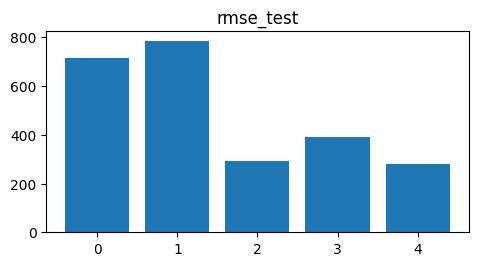

In [ ]:

cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterate through CV splits
rmse_test_arr = []
rrmse_test_arr =[]
r2_test_arr= []
mae_test_arr = []

rmse_train_arr = []
rrmse_train_arr =[]
r2_train_arr= []
mae_train_arr = []

for tr, tt in cv.split(df_train): #tr,tt are indexes
    x_train, x_test = df_train[selected_features_final].iloc[tr], df_train[selected_features_final].iloc[tt]
    y_train, y_test = df_train['yield'].iloc[tr], df_train['yield'].iloc[tt]
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(x_train)
    X_test = scaler.transform(x_test)
    model = ElasticNet(alpha=0.01).fit(X_train, y_train)
    y_pred= model.predict(X_test)
    y_pred_train= model.predict(X_train)

    r2_test=r2_score(y_test,y_pred)
    r2_train=r2_score(y_train,y_pred_train)
    #print(r2_test)
    #print(r2_train)
    r2_test_arr.append(r2_test)
    r2_train_arr.append(r2_train)

    rmse_test = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
    #print("\nRMSE test: ", rmse_test)
    rmse_test_arr.append(rmse_test)

    rrmse_test = format(float(rmse_test*100/np.mean(y_test)),'.2f')
    #print("\nRRMSE test: ", rrmse_test,"%")
    rrmse_test_arr.append(rrmse_test)

    rmse_train = float(format(np.sqrt(mean_squared_error(y_train, y_pred_train)), '.3f'))
    #print("\nRMSE train: ", rmse_train)
    rmse_train_arr.append(rmse_train)

    rrmse_train = format(float(rmse_train*100/np.mean(y_train)),'.2f')
    #print("\nRRMSE train: ", rrmse_train,"%")
    rrmse_train_arr.append(rrmse_train)


    mae_test = float(format(mean_absolute_error(y_test, y_pred), '.3f'))
    #print("\nMAE Test: ", mae_test)
    mae_test_arr.append(mae_test)
    mae_train = float(format(mean_absolute_error(y_train, y_pred_train), '.3f'))
    #print("\nMAE Train: ", mae_train)
    mae_train_arr.append(mae_train)

# data['Method'][0]='LR'
# data['RMSE test'][0]=np.mean(rmse_test_arr)
# data['RMSE train'][0]=np.mean(rmse_train_arr)
# data['RRMSE test'][0]=np.mean(np.array(rrmse_test_arr).astype(np.float))
# data['RRMSE train'][0]=np.mean(np.array(rrmse_train_arr).astype(np.float))
# data['MAE test'][0]=np.mean(mae_test_arr)
# data['MAE train'][0]=np.mean(mae_train_arr)
# data['R2_score test'][0]=np.mean(r2_test_arr)
# data['R2_score train'][0]=np.mean(r2_train_arr)

plt.figure(figsize=(12,12))
plt.subplot(4, 2, 1)
plt.title("rmse_test")
plt.bar([x for x in [0,1,2,3,4]],[rmse_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 2)
# plt.title("rmse_train")
# plt.bar([x for x in [0,1,2,3,4]],[rmse_train_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 3)
# plt.title("rrmse_test")
# plt.bar([x for x in [0,1,2,3,4]],[rrmse_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 4)
# plt.title("rrmse_train")
# plt.bar([x for x in [0,1,2,3,4]],[rrmse_train_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 5)
# plt.title("r2_test")
# plt.bar([x for x in [0,1,2,3,4]],[r2_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 6)
# plt.title("r2_train")
# plt.bar([x for x in [0,1,2,3,4]],[r2_train_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 7)
# plt.title("mae_test")
# plt.bar([x for x in [0,1,2,3,4]],[mae_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 8)
# plt.title("mae_train")
# plt.bar([x for x in [0,1,2,3,4]],[mae_train_arr[x] for x in [0,1,2,3,4]])
# plt.show()



##SVR

[ 1  2  3  5  6  7  8  9 11 13 14 15 16 17 19 20 21 23 24 25 27 29 30 31
 32 33 34 36 37 38 41 42 43 45 46 47 48 49 50 51 52 53 54 57 58 59 60 61
 62 63 64 66 67 68 69 71 72 73 74 75 76 77 78 79 80 82 83 84 85 87 88 89] [ 0  4 10 12 18 22 26 28 35 39 40 44 55 56 65 70 81 86]
[ 0  1  2  3  4  6  7  8 10 12 13 14 15 17 18 19 20 21 22 23 24 25 26 27
 28 29 32 34 35 36 37 38 39 40 41 43 44 45 46 48 50 51 52 53 54 55 56 57
 58 59 60 61 63 64 65 70 71 72 74 77 78 79 80 81 82 83 84 85 86 87 88 89] [ 5  9 11 16 30 31 33 42 47 49 62 66 67 68 69 73 75 76]
[ 0  1  2  4  5  9 10 11 12 14 15 16 18 20 21 22 23 26 28 29 30 31 32 33
 35 36 37 39 40 41 42 43 44 46 47 48 49 50 51 52 54 55 56 57 58 59 60 61
 62 63 65 66 67 68 69 70 71 72 73 74 75 76 77 79 80 81 82 83 85 86 88 89] [ 3  6  7  8 13 17 19 24 25 27 34 38 45 53 64 78 84 87]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 33 34 35 37 38 39 40 42 44 45 47 49 51 52 53 55 56
 59 60 62 63 64 65 66 67 6

<ipython-input-211-133a26613ba5>:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data['RRMSE test'][1]=np.mean(np.array(rrmse_test_arr).astype(np.float))
<ipython-input-211-133a26613ba5>:69: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data['RRMSE train'][1]=np.mean(np.array(rrmse_train_arr).astype(np.float))


<BarContainer object of 5 artists>

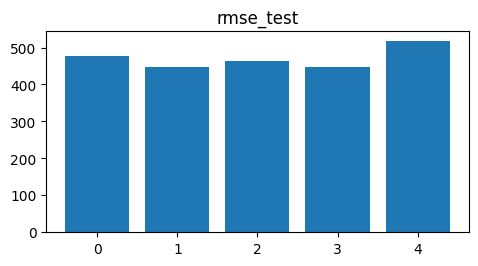

In [ ]:


cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterate through CV splits
rmse_test_arr = []
rrmse_test_arr =[]
r2_test_arr= []
mae_test_arr = []

rmse_train_arr = []
rrmse_train_arr =[]
r2_train_arr= []
mae_train_arr = []

bias_test_arr = []
bias_train_arr = []


for tr, tt in cv.split(df_train): #tr,tt are indexes
    x_train, x_test = df_train[selected_features_final].iloc[tr], df_train[selected_features_final].iloc[tt]
    y_train, y_test = df_train['yield'].iloc[tr], df_train['yield'].iloc[tt]
    print(tr,tt)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(x_train)
    X_test = scaler.transform(x_test)
    model = SVR().fit(X_train, y_train)
    y_pred= model.predict(X_test)
    y_pred_train= model.predict(X_train)

    r2_test=r2_score(y_test,y_pred)
    r2_train=r2_score(y_train,y_pred_train)
    #print(r2_test)
    #print(r2_train)
    r2_test_arr.append(r2_test)
    r2_train_arr.append(r2_train)

    rmse_test = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
    #print("\nRMSE test: ", rmse_test)
    rmse_test_arr.append(rmse_test)

    rrmse_test = format(float(rmse_test*100/np.mean(y_test)),'.2f')
    #print("\nRRMSE test: ", rrmse_test,"%")
    rrmse_test_arr.append(rrmse_test)

    rmse_train = float(format(np.sqrt(mean_squared_error(y_train, y_pred_train)), '.3f'))
    #print("\nRMSE train: ", rmse_train)
    rmse_train_arr.append(rmse_train)

    rrmse_train = format(float(rmse_train*100/np.mean(y_train)),'.2f')
    #print("\nRRMSE train: ", rrmse_train,"%")
    rrmse_train_arr.append(rrmse_train)


    mae_test = float(format(mean_absolute_error(y_test, y_pred), '.3f'))
    #print("\nMAE Test: ", mae_test)
    mae_test_arr.append(mae_test)
    mae_train = float(format(mean_absolute_error(y_train, y_pred_train), '.3f'))
    #print("\nMAE Train: ", mae_train)
    mae_train_arr.append(mae_train)

                #print("\nBias Test: \n", bias_value(y_test,y_pred))
    bias_test_arr.append(bias_value(y_test,y_pred))
    #print("\nBias Train: \n", bias_value(y_train, y_pred_train))
    bias_train_arr.append(bias_value(y_train, y_pred_train))

data['Method'][1]='SVR'
data['RMSE test'][1]=np.mean(rmse_test_arr)
data['RMSE train'][1]=np.mean(rmse_train_arr)
data['RRMSE test'][1]=np.mean(np.array(rrmse_test_arr).astype(np.float))
data['RRMSE train'][1]=np.mean(np.array(rrmse_train_arr).astype(np.float))
data['MAE test'][1]=np.mean(mae_test_arr)
data['MAE train'][1]=np.mean(mae_train_arr)
data['R2_score test'][1]=np.mean(r2_test_arr)
data['R2_score train'][1]=np.mean(r2_train_arr)
data['Bias test'][1]=np.mean(bias_test_arr)
data['Bias train'][1]=np.mean(bias_train_arr)

plt.figure(figsize=(12,12))
plt.subplot(4, 2, 1)
plt.title("rmse_test")
plt.bar([x for x in [0,1,2,3,4]],[rmse_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 2)
# plt.title("rmse_train")
# plt.bar([x for x in [0,1,2,3,4]],[rmse_train_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 3)
# plt.title("rrmse_test")
# plt.bar([x for x in [0,1,2,3,4]],[rrmse_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 4)
# plt.title("rrmse_train")
# plt.bar([x for x in [0,1,2,3,4]],[rrmse_train_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 5)
# plt.title("r2_test")
# plt.bar([x for x in [0,1,2,3,4]],[r2_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 6)
# plt.title("r2_train")
# plt.bar([x for x in [0,1,2,3,4]],[r2_train_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 7)
# plt.title("mae_test")
# plt.bar([x for x in [0,1,2,3,4]],[mae_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 8)
# plt.title("mae_train")
# plt.bar([x for x in [0,1,2,3,4]],[mae_train_arr[x] for x in [0,1,2,3,4]])
# plt.show()



In [ ]:
tr = [ 0, 3, 4, 6, 7, 8, 9, 10, 11, 14, 15, 16, 17, 18, 19, 20, 21, 22]
tt = [1, 2, 5, 12, 13]
x_train, x_test = df_train[selected_features_final].iloc[tr], df_train[selected_features_final].iloc[tt]
y_train, y_test = df_train['yield'].iloc[tr], df_train['yield'].iloc[tt]
print(tr,tt)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)
model = SVR().fit(X_train, y_train)

x_ = df_test[selected_features_final]
y_ = df_test['yield']
y_pred_ = model.predict(x_)

rmse_test = float(format(np.sqrt(mean_squared_error(y_pred_, y_)), '.3f'))
print("\nRMSE test: ", rmse_test)

rrmse_test = format(float(rmse_test*100/np.mean(y_)),'.2f')
print("\nRRMSE test: ", rrmse_test,"%")


# plt.figure(figsize=(12,12))
# plt.scatter(y_, y_pred_)
# # p1 = max(max(y_pred_), max(y_))
# # p2 = min(min(y_pred_), min(y_))
# # plt.plot( [p1,p2], [p1,p2], linestyle='--', color='k' )
# plt.show()

[0, 3, 4, 6, 7, 8, 9, 10, 11, 14, 15, 16, 17, 18, 19, 20, 21, 22] [1, 2, 5, 12, 13]

RMSE test:  514.489

RRMSE test:  14.55 %


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


##MLP

[ 1  2  3  4  5  6  7 10 11 12 13 14 16 18 19 20 21 22] [ 0  8  9 15 17]
[ 0  3  4  6  7  8  9 10 11 14 15 16 17 18 19 20 21 22] [ 1  2  5 12 13]
[ 0  1  2  5  6  7  8  9 10 12 13 14 15 16 17 19 21 22] [ 3  4 11 18 20]
[ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 17 18 19 20] [ 7 16 21 22]
[ 0  1  2  3  4  5  7  8  9 11 12 13 15 16 17 18 20 21 22] [ 6 10 14 19]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
<ipython-input-182-74aaa3f52309>:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data['RRMSE test'][2]=np.mean(np.array(rrmse_test_arr).astype(np.float))
<ipython-input-182-74aaa3f52309>:69: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` h

<BarContainer object of 5 artists>

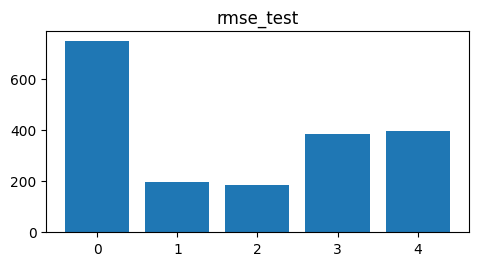

In [ ]:

cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterate through CV splits
rmse_test_arr = []
rrmse_test_arr =[]
r2_test_arr= []
mae_test_arr = []

rmse_train_arr = []
rrmse_train_arr =[]
r2_train_arr= []
mae_train_arr = []

bias_test_arr = []
bias_train_arr = []


for tr, tt in cv.split(df_train): #tr,tt are indexes
    x_train, x_test = df_train[selected_features_final].iloc[tr], df_train[selected_features_final].iloc[tt]
    y_train, y_test = df_train['yield'].iloc[tr], df_train['yield'].iloc[tt]
    print(tr,tt)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(x_train)
    X_test = scaler.transform(x_test)
    model = MLPRegressor(hidden_layer_sizes=(64,64,64),activation="relu" ,random_state=1, max_iter=2000).fit(X_train, y_train)
    y_pred= model.predict(X_test)
    y_pred_train= model.predict(X_train)

    r2_test=r2_score(y_test,y_pred)
    r2_train=r2_score(y_train,y_pred_train)
    #print(r2_test)
    #print(r2_train)
    r2_test_arr.append(r2_test)
    r2_train_arr.append(r2_train)

    rmse_test = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
    #print("\nRMSE test: ", rmse_test)
    rmse_test_arr.append(rmse_test)

    rrmse_test = format(float(rmse_test*100/np.mean(y_test)),'.2f')
    #print("\nRRMSE test: ", rrmse_test,"%")
    rrmse_test_arr.append(rrmse_test)

    rmse_train = float(format(np.sqrt(mean_squared_error(y_train, y_pred_train)), '.3f'))
    #print("\nRMSE train: ", rmse_train)
    rmse_train_arr.append(rmse_train)

    rrmse_train = format(float(rmse_train*100/np.mean(y_train)),'.2f')
    #print("\nRRMSE train: ", rrmse_train,"%")
    rrmse_train_arr.append(rrmse_train)


    mae_test = float(format(mean_absolute_error(y_test, y_pred), '.3f'))
    #print("\nMAE Test: ", mae_test)
    mae_test_arr.append(mae_test)
    mae_train = float(format(mean_absolute_error(y_train, y_pred_train), '.3f'))
    #print("\nMAE Train: ", mae_train)
    mae_train_arr.append(mae_train)

                #print("\nBias Test: \n", bias_value(y_test,y_pred))
    bias_test_arr.append(bias_value(y_test,y_pred))
    #print("\nBias Train: \n", bias_value(y_train, y_pred_train))
    bias_train_arr.append(bias_value(y_train, y_pred_train))

data['Method'][2]='MLP'
data['RMSE test'][2]=np.mean(rmse_test_arr)
data['RMSE train'][2]=np.mean(rmse_train_arr)
data['RRMSE test'][2]=np.mean(np.array(rrmse_test_arr).astype(np.float))
data['RRMSE train'][2]=np.mean(np.array(rrmse_train_arr).astype(np.float))
data['MAE test'][2]=np.mean(mae_test_arr)
data['MAE train'][2]=np.mean(mae_train_arr)
data['R2_score test'][2]=np.mean(r2_test_arr)
data['R2_score train'][2]=np.mean(r2_train_arr)
data['Bias test'][2]=np.mean(bias_test_arr)
data['Bias train'][2]=np.mean(bias_train_arr)

plt.figure(figsize=(12,12))
plt.subplot(4, 2, 1)
plt.title("rmse_test")
plt.bar([x for x in [0,1,2,3,4]],[rmse_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 2)
# plt.title("rmse_train")
# plt.bar([x for x in [0,1,2,3,4]],[rmse_train_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 3)
# plt.title("rrmse_test")
# plt.bar([x for x in [0,1,2,3,4]],[rrmse_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 4)
# plt.title("rrmse_train")
# plt.bar([x for x in [0,1,2,3,4]],[rrmse_train_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 5)
# plt.title("r2_test")
# plt.bar([x for x in [0,1,2,3,4]],[r2_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 6)
# plt.title("r2_train")
# plt.bar([x for x in [0,1,2,3,4]],[r2_train_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 7)
# plt.title("mae_test")
# plt.bar([x for x in [0,1,2,3,4]],[mae_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 8)
# plt.title("mae_train")
# plt.bar([x for x in [0,1,2,3,4]],[mae_train_arr[x] for x in [0,1,2,3,4]])
# plt.show()



In [ ]:
tr = [0, 1, 2, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 19, 21, 22]
tt = [3, 4, 11, 18, 20]
x_train, x_test = df_train[selected_features_final].iloc[tr], df_train[selected_features_final].iloc[tt]
y_train, y_test = df_train['yield'].iloc[tr], df_train['yield'].iloc[tt]
print(tr,tt)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)
model = MLPRegressor(hidden_layer_sizes=(64,64,64),activation="relu" ,random_state=1, max_iter=2000).fit(X_train, y_train)

x_ = df_test[selected_features_final]
y_ = df_test['yield']
y_pred_ = model.predict(x_)

rmse_test = float(format(np.sqrt(mean_squared_error(y_pred_, y_)), '.3f'))
print("\nRMSE test: ", rmse_test)

rrmse_test = format(float(rmse_test*100/np.mean(y_)),'.2f')
print("\nRRMSE test: ", rrmse_test,"%")


# plt.figure(figsize=(12,12))
# plt.scatter(y_, y_pred_)
# # p1 = max(max(y_pred_), max(y_))
# # p2 = min(min(y_pred_), min(y_))
# # plt.plot( [p1,p2], [p1,p2], linestyle='--', color='k' )
# plt.show()

[0, 1, 2, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 19, 21, 22] [3, 4, 11, 18, 20]

RMSE test:  7485.401

RRMSE test:  211.67 %


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(


##KNN

[ 0  8  9 15 17] [ 1  2  3  4  5  6  7 10 11 12 13 14 16 18 19 20 21 22]
[ 1  2  5 12 13] [ 0  3  4  6  7  8  9 10 11 14 15 16 17 18 19 20 21 22]
[ 3  4 11 18 20] [ 0  1  2  5  6  7  8  9 10 12 13 14 15 16 17 19 21 22]
[ 7 16 21 22] [ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 17 18 19 20]
[ 6 10 14 19] [ 0  1  2  3  4  5  7  8  9 11 12 13 15 16 17 18 20 21 22]


<ipython-input-188-2e4e09fd7a5a>:69: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data['RRMSE test'][3]=np.mean(np.array(rrmse_test_arr).astype(np.float))
<ipython-input-188-2e4e09fd7a5a>:70: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data['RRMSE train'][3]=np.mean(np.array(rrmse_train_arr).astype(np.float))


<BarContainer object of 5 artists>

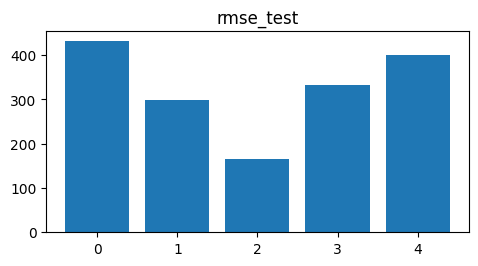

In [ ]:


cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterate through CV splits
rmse_test_arr = []
rrmse_test_arr =[]
r2_test_arr= []
mae_test_arr = []

rmse_train_arr = []
rrmse_train_arr =[]
r2_train_arr= []
mae_train_arr = []

bias_test_arr = []
bias_train_arr = []


for tr, tt in cv.split(df_train): #tr,tt are indexes
    x_train, x_test = df_train[selected_features_final].iloc[tr], df_train[selected_features_final].iloc[tt]
    y_train, y_test = df_train['yield'].iloc[tr], df_train['yield'].iloc[tt]
    print(tt,tr)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(x_train)
    X_test = scaler.transform(x_test)
    K=5
    model = neighbors.KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_pred= model.predict(X_test)
    y_pred_train= model.predict(X_train)

    r2_test=r2_score(y_test,y_pred)
    r2_train=r2_score(y_train,y_pred_train)
    #print(r2_test)
    #print(r2_train)
    r2_test_arr.append(r2_test)
    r2_train_arr.append(r2_train)

    rmse_test = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
    #print("\nRMSE test: ", rmse_test)
    rmse_test_arr.append(rmse_test)

    rrmse_test = format(float(rmse_test*100/np.mean(y_test)),'.2f')
    #print("\nRRMSE test: ", rrmse_test,"%")
    rrmse_test_arr.append(rrmse_test)

    rmse_train = float(format(np.sqrt(mean_squared_error(y_train, y_pred_train)), '.3f'))
    #print("\nRMSE train: ", rmse_train)
    rmse_train_arr.append(rmse_train)

    rrmse_train = format(float(rmse_train*100/np.mean(y_train)),'.2f')
    #print("\nRRMSE train: ", rrmse_train,"%")
    rrmse_train_arr.append(rrmse_train)


    mae_test = float(format(mean_absolute_error(y_test, y_pred), '.3f'))
    #print("\nMAE Test: ", mae_test)
    mae_test_arr.append(mae_test)
    mae_train = float(format(mean_absolute_error(y_train, y_pred_train), '.3f'))
    #print("\nMAE Train: ", mae_train)
    mae_train_arr.append(mae_train)

                #print("\nBias Test: \n", bias_value(y_test,y_pred))
    bias_test_arr.append(bias_value(y_test,y_pred))
    #print("\nBias Train: \n", bias_value(y_train, y_pred_train))
    bias_train_arr.append(bias_value(y_train, y_pred_train))

data['Method'][3]='KNN'
data['RMSE test'][3]=np.mean(rmse_test_arr)
data['RMSE train'][3]=np.mean(rmse_train_arr)
data['RRMSE test'][3]=np.mean(np.array(rrmse_test_arr).astype(np.float))
data['RRMSE train'][3]=np.mean(np.array(rrmse_train_arr).astype(np.float))
data['MAE test'][3]=np.mean(mae_test_arr)
data['MAE train'][3]=np.mean(mae_train_arr)
data['R2_score test'][3]=np.mean(r2_test_arr)
data['R2_score train'][3]=np.mean(r2_train_arr)
data['Bias test'][3]=np.mean(bias_test_arr)
data['Bias train'][3]=np.mean(bias_train_arr)

plt.figure(figsize=(12,12))
plt.subplot(4, 2, 1)
plt.title("rmse_test")
plt.bar([x for x in [0,1,2,3,4]],[rmse_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 2)
# plt.title("rmse_train")
# plt.bar([x for x in [0,1,2,3,4]],[rmse_train_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 3)
# plt.title("rrmse_test")
# plt.bar([x for x in [0,1,2,3,4]],[rrmse_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 4)
# plt.title("rrmse_train")
# plt.bar([x for x in [0,1,2,3,4]],[rrmse_train_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 5)
# plt.title("r2_test")
# plt.bar([x for x in [0,1,2,3,4]],[r2_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 6)
# plt.title("r2_train")
# plt.bar([x for x in [0,1,2,3,4]],[r2_train_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 7)
# plt.title("mae_test")
# plt.bar([x for x in [0,1,2,3,4]],[mae_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 8)
# plt.title("mae_train")
# plt.bar([x for x in [0,1,2,3,4]],[mae_train_arr[x] for x in [0,1,2,3,4]])
# plt.show()



In [ ]:
tr = [ 0, 1, 2, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 19, 21, 22]
tt = [ 3, 4, 11, 18, 20]
x_train, x_test = df_train[selected_features_final].iloc[tr], df_train[selected_features_final].iloc[tt]
y_train, y_test = df_train['yield'].iloc[tr], df_train['yield'].iloc[tt]
print(tr,tt)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)
model = neighbors.KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)

x_ = df_test[selected_features_final]
y_ = df_test['yield']
y_pred_ = model.predict(x_)

rmse_test = float(format(np.sqrt(mean_squared_error(y_pred_, y_)), '.3f'))
print("\nRMSE test: ", rmse_test)

rrmse_test = format(float(rmse_test*100/np.mean(y_)),'.2f')
print("\nRRMSE test: ", rrmse_test,"%")


# plt.figure(figsize=(12,12))
# plt.scatter(y_, y_pred_)
# # p1 = max(max(y_pred_), max(y_))
# # p2 = min(min(y_pred_), min(y_))
# # plt.plot( [p1,p2], [p1,p2], linestyle='--', color='k' )
# plt.show()

[0, 1, 2, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 19, 21, 22] [3, 4, 11, 18, 20]

RMSE test:  595.429

RRMSE test:  16.84 %


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


##Random Forest

In [ ]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterate through CV splits
rmse_test_arr = []
rrmse_test_arr =[]
r2_test_arr= []
mae_test_arr = []

rmse_train_arr = []
rrmse_train_arr =[]
r2_train_arr= []
mae_train_arr = []

bias_test_arr = []
bias_train_arr = []

for tr, tt in cv.split(df_train): #tr,tt are indexes
    x_train, x_test = df_train[selected_features_final].iloc[tr], df_train[selected_features_final].iloc[tt]
    y_train, y_test = df_train['yield'].iloc[tr], df_train['yield'].iloc[tt]
    print(tr,tt)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(pd.DataFrame(x_train))
    X_test = scaler.transform(pd.DataFrame(x_test))
    model =  RandomForestRegressor(n_estimators = 1000, random_state = 42).fit(X_train, y_train)
    y_pred= model.predict(X_test)
    y_pred_train= model.predict(X_train)

    r2_test=r2_score(y_test,y_pred)
    r2_train=r2_score(y_train,y_pred_train)
    #print(r2_test)
    #print(r2_train)
    r2_test_arr.append(r2_test)
    r2_train_arr.append(r2_train)

    rmse_test = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
    #print("\nRMSE test: ", rmse_test)
    rmse_test_arr.append(rmse_test)

    rrmse_test = format(float(rmse_test*100/np.mean(y_test)),'.2f')
    #print("\nRRMSE test: ", rrmse_test,"%")
    rrmse_test_arr.append(rrmse_test)

    rmse_train = float(format(np.sqrt(mean_squared_error(y_train, y_pred_train)), '.3f'))
    #print("\nRMSE train: ", rmse_train)
    rmse_train_arr.append(rmse_train)

    rrmse_train = format(float(rmse_train*100/np.mean(y_train)),'.2f')
    #print("\nRRMSE train: ", rrmse_train,"%")
    rrmse_train_arr.append(rrmse_train)


    mae_test = float(format(mean_absolute_error(y_test, y_pred), '.3f'))
    #print("\nMAE Test: ", mae_test)
    mae_test_arr.append(mae_test)
    mae_train = float(format(mean_absolute_error(y_train, y_pred_train), '.3f'))
    #print("\nMAE Train: ", mae_train)
    mae_train_arr.append(mae_train)

    #print("\nBias Test: \n", bias_value(y_test,y_pred))
    bias_test_arr.append(bias_value(y_test,y_pred))
    #print("\nBias Train: \n", bias_value(y_train, y_pred_train))
    bias_train_arr.append(bias_value(y_train, y_pred_train))

data['Method'][4]='Random Forest'
data['RMSE test'][4]=np.mean(rmse_test_arr)
data['RMSE train'][4]=np.mean(rmse_train_arr)
data['RRMSE test'][4]=np.mean(np.array(rrmse_test_arr).astype(np.float))
data['RRMSE train'][4]=np.mean(np.array(rrmse_train_arr).astype(np.float))
data['MAE test'][4]=np.mean(mae_test_arr)
data['MAE train'][4]=np.mean(mae_train_arr)
data['R2_score test'][4]=np.mean(r2_test_arr)
data['R2_score train'][4]=np.mean(r2_train_arr)
data['Bias test'][4]=np.mean(bias_test_arr)
data['Bias train'][4]=np.mean(bias_train_arr)

print(np.array(rmse_test_arr).astype(np.float))
print(sum(np.array(rmse_test_arr))/5)
x_train, x_test = df_train[selected_features_final], df_test[selected_features_final]
y_train, y_test = df_train['yield'], df_test['yield']

X_train = scaler.fit_transform(pd.DataFrame(x_train))
X_test = scaler.transform(pd.DataFrame(x_test))
#model =  RandomForestRegressor(n_estimators = 1000, random_state = 42).fit(X_train, y_train)
y_pred= model.predict(X_test)
rmse_test = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print(rmse_test)

[ 1  2  3  4  5  6  7 10 11 12 13 14 16 18 19 20 21 22] [ 0  8  9 15 17]
[ 0  3  4  6  7  8  9 10 11 14 15 16 17 18 19 20 21 22] [ 1  2  5 12 13]
[ 0  1  2  5  6  7  8  9 10 12 13 14 15 16 17 19 21 22] [ 3  4 11 18 20]
[ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 17 18 19 20] [ 7 16 21 22]
[ 0  1  2  3  4  5  7  8  9 11 12 13 15 16 17 18 20 21 22] [ 6 10 14 19]
[463.925 351.848 331.636 359.803 420.403]
385.523
665.285


<ipython-input-191-1381b4b6e99c>:67: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data['RRMSE test'][4]=np.mean(np.array(rrmse_test_arr).astype(np.float))
<ipython-input-191-1381b4b6e99c>:68: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data['RRMSE train'][4]=np.mean(np.array(rrmse_train_arr).astype(np.float))
<ipython-input-191-1381b4b

In [ ]:
tr = [ 0, 1, 2, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 19, 21, 22]
tt = [3, 4, 11, 18, 20]
x_train, x_test = df_train[selected_features_final].iloc[tr], df_train[selected_features_final].iloc[tt]
y_train, y_test = df_train['yield'].iloc[tr], df_train['yield'].iloc[tt]
print(tr,tt)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)
model = RandomForestRegressor(n_estimators = 1000, random_state = 42).fit(X_train, y_train)

x_ = df_test[selected_features_final]
y_ = df_test['yield']
y_pred_ = model.predict(x_)

rmse_test = float(format(np.sqrt(mean_squared_error(y_pred_, y_)), '.3f'))
print("\nRMSE test: ", rmse_test)

rrmse_test = format(float(rmse_test*100/np.mean(y_)),'.2f')
print("\nRRMSE test: ", rrmse_test,"%")


# plt.figure(figsize=(12,12))
# plt.scatter(y_, y_pred_)
# # p1 = max(max(y_pred_), max(y_))
# # p2 = min(min(y_pred_), min(y_))
# # plt.plot( [p1,p2], [p1,p2], linestyle='--', color='k' )
# plt.show()

[0, 1, 2, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 19, 21, 22] [3, 4, 11, 18, 20]

RMSE test:  666.524

RRMSE test:  18.85 %


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


### stepwise feature selection

In [ ]:
# import joblib
# import sys
# sys.modules['sklearn.externals.joblib'] = joblib
# from mlxtend.feature_selection import SequentialFeatureSelector as sfs
# X = df_train.drop(['year','yield'], axis=1)
# y = df_train['yield']
# # from sklearn.model_selection import train_test_split
# # x_train, x_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=42)
# # y_train = y_train.ravel()
# # y_test = y_test.ravel()

# # print('Training dataset shape:', X_train.shape, y_train.shape)
# # print('Testing dataset shape:', X_test.shape, y_test.shape)
# clf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# metric_list = []
# feature_set = []
# max_n=0
# max=-math.inf
# # Build step forward feature selection
# for n in range(0,10):
#   num_of_features = n+1
#   sfs1 = sfs(clf,
#             k_features=num_of_features,
#             forward=True,
#             floating=False,
#             verbose=2,
#             scoring='neg_mean_squared_error',
#             cv=5)

#   # Perform SFFS
#   sfs1 = sfs1.fit(X, y)
#   feat_names = list(sfs1.k_feature_names_)
#   if max < sfs1.k_score_:
#     max = sfs1.k_score_
#     max_n=num_of_features

#   print(sfs1.k_score_ ,': ', sfs1.k_feature_names_)

# #metric_list.sort(key=lambda x : x[0], reverse = True)
# #feature_set.append(metric_list[0][1])
# print('max:',max, ':',max_n )

In [ ]:


cv = KFold(n_splits=5, shuffle=False)

# Iterate through CV splits
rmse_test_arr = []
rrmse_test_arr =[]
r2_test_arr= []
mae_test_arr = []

rmse_train_arr = []
rrmse_train_arr =[]
r2_train_arr= []
mae_train_arr = []

bias_test_arr = []
bias_train_arr = []

for tr, tt in cv.split(df_train): #tr,tt are indexes
    x_train, x_test = df_train[['X1', 'X5', 'X7', 'X10']].iloc[tr], df_train[['X1', 'X5', 'X7', 'X10']].iloc[tt]
    y_train, y_test = df_train['yield'].iloc[tr], df_train['yield'].iloc[tt]
    print(tr,tt)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(pd.DataFrame(x_train))
    X_test = scaler.transform(pd.DataFrame(x_test))
    model =  RandomForestRegressor(n_estimators = 1000, random_state = 42).fit(X_train, y_train)
    y_pred= model.predict(X_test)
    y_pred_train= model.predict(X_train)

    r2_test=r2_score(y_test,y_pred)
    r2_train=r2_score(y_train,y_pred_train)
    #print(r2_test)
    #print(r2_train)
    r2_test_arr.append(r2_test)
    r2_train_arr.append(r2_train)

    rmse_test = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
    #print("\nRMSE test: ", rmse_test)
    rmse_test_arr.append(rmse_test)

    rrmse_test = format(float(rmse_test*100/np.mean(y_test)),'.2f')
    #print("\nRRMSE test: ", rrmse_test,"%")
    rrmse_test_arr.append(rrmse_test)

    rmse_train = float(format(np.sqrt(mean_squared_error(y_train, y_pred_train)), '.3f'))
    #print("\nRMSE train: ", rmse_train)
    rmse_train_arr.append(rmse_train)

    rrmse_train = format(float(rmse_train*100/np.mean(y_train)),'.2f')
    #print("\nRRMSE train: ", rrmse_train,"%")
    rrmse_train_arr.append(rrmse_train)


    mae_test = float(format(mean_absolute_error(y_test, y_pred), '.3f'))
    #print("\nMAE Test: ", mae_test)
    mae_test_arr.append(mae_test)
    mae_train = float(format(mean_absolute_error(y_train, y_pred_train), '.3f'))
    #print("\nMAE Train: ", mae_train)
    mae_train_arr.append(mae_train)

    #print("\nBias Test: \n", bias_value(y_test,y_pred))
    bias_test_arr.append(bias_value(y_test,y_pred))
    #print("\nBias Train: \n", bias_value(y_train, y_pred_train))
    bias_train_arr.append(bias_value(y_train, y_pred_train))

print(np.array(rmse_test_arr).astype(np.float))

x_train, x_test = df_train[['X1', 'X5', 'X7', 'X10']], df_test[['X1', 'X5', 'X7', 'X10']]
y_train, y_test = df_train['yield'], df_test['yield']

# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(pd.DataFrame(x_train))
# X_test = scaler.transform(pd.DataFrame(x_test))
# #model =  RandomForestRegressor(n_estimators = 1000, random_state = 42).fit(X_train, y_train)
# y_pred= model.predict(X_test)
# rmse_test = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
# print(rmse_test)

[ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23] [0 1 2 3 4]
[ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23] [5 6 7 8 9]
[ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23] [10 11 12 13 14]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23] [15 16 17 18 19]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [20 21 22 23]
[710.672 423.24  306.341 347.517 623.42 ]


<ipython-input-36-ebfd0f4527c8>:64: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(np.array(rmse_test_arr).astype(np.float))


In [ ]:
x_train, x_test = df_train[['X1', 'X2', 'X4', 'X7', 'X10', 'X11']].iloc[[0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9, 10, 11, 16, 17, 18]], df_train[['X1', 'X2', 'X4', 'X7', 'X10', 'X11']].iloc[[12, 13, 14, 15]]
y_train, y_test = df_train['yield'].iloc[[0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9, 10, 11, 16, 17, 18]], df_train['yield'].iloc[[12, 13, 14, 15]]
#df3 [ 0  1  2  3  4  5  6  7 12 13 14 15 16 17] [ 8  9 10 11]
#df2 [ 0  1  2  3  4  5  6  7  8  9 10 11 16 17 18] [12 13 14 15]
#df4 [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] [5 6 7 8 9]
scaler = MinMaxScaler()
X_train = scaler.fit_transform(pd.DataFrame(x_train))
X_test = scaler.transform(pd.DataFrame(x_test))
model =  RandomForestRegressor(n_estimators = 1000, random_state = 42).fit(X_train, y_train)

Df_test = scaler.transform(pd.DataFrame(df_test[['X1', 'X2', 'X4', 'X7', 'X10', 'X11']]))
y_pred_ = model.predict(Df_test)
rmse_test = float(format(np.sqrt(mean_squared_error(df_test['yield'], y_pred_)), '.3f'))
print(rmse_test)


1096.849


# Results

In [ ]:
mydf = pd.DataFrame(data, columns = ['Method', 'RMSE test','RMSE train','RRMSE test','RRMSE train','MAE test','MAE train','R2_score test','R2_score train','Bias test','Bias train'])
print("dataset: ", dataset)
print("test size : ",test_size,",", test_size*100/len(df.index),"%")
print(mydf)

dataset:  Kurunegala yala kannaya
test size :  9 , 7.03125 %
              Method  RMSE test  RMSE train  RRMSE test  RRMSE train  \
0  Linear Regression   330.4370    292.0516      10.800        9.550   
1                SVR   326.4872    304.2878      10.668        9.948   
2                MLP   382.8500    309.4856      12.550       10.116   
3                KNN   325.2788    283.5526      10.644        9.272   
4      Random Forest   385.5230    162.2886      12.634        5.308   

   MAE test  MAE train  R2_score test  R2_score train  Bias test    Bias train  
0  285.4028   237.2414      -0.882809        0.053783   4.565696  6.515386e-14  
1  273.5434   242.6462      -0.910164       -0.026444 -41.283938 -4.742286e+01  
2  326.4754   258.0990      -1.436611       -0.071461   7.207199 -4.169268e-01  
3  272.1860   236.0558      -0.761869        0.103401   6.662000 -6.374386e+00  
4  331.5776   135.1998      -1.613432        0.703530  27.793352  7.911754e+00  


In [ ]:
mydf.to_excel (r'initial_export_dataframe.xlsx', index = False, header=True)